# Step 0: Get letter scores

In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('keyfile.csv')

# Get unique values in the 'Identifier' column
unique_identifiers = df['Identifier'].unique()

# Create a dictionary with unique numbers for each identifier
ID_dict = {identifier: index + 1 for index, identifier in enumerate(unique_identifiers)}

# Print the dictionary
print(ID_dict)


{'A22-0000': 1, 'A22-1000': 2, 'A22-2000': 3, 'A22-7000': 4, 'A23-0002': 5, 'A23-0003': 6, 'A23-0004': 7, 'A23-0006': 8, 'A23-0008': 9, 'A23-0010': 10, 'A23-0012': 11, 'A23-0015': 12, 'A23-0017': 13, 'A23-0018': 14, 'A23-0019': 15, 'A23-0022': 16, 'A23-0024': 17, 'A23-0034': 18, 'A23-0035': 19, 'A23-0037': 20, 'A23-0038': 21, 'A23-0040': 22, 'A23-1000': 23, 'A23-1100': 24, 'A23-2000': 25, 'A23-2100': 26, 'A23-6000': 27, 'A23-7000': 28, 'A23-8000': 29, 'A23-9000': 30, 'C22-1100': 31, 'C22-1200': 32, 'C22-1500': 33, 'C22-2000': 34, 'C22-3000': 35, 'C22-8000': 36, 'C22-9000': 37, 'A22-4000': 38, 'A22-5000': 39, 'A23-0000': 40, 'A23-0001': 41, 'A23-0005': 42, 'A23-0007': 43, 'A23-0009': 44, 'A23-0011': 45, 'A23-0013': 46, 'A23-0016': 47, 'A23-0021': 48, 'A23-0023': 49, 'A23-0025': 50, 'A23-0026': 51, 'A23-0027': 52, 'A23-0028': 53, 'A23-0029': 54, 'A23-0030': 55, 'A23-0031': 56, 'A23-0032': 57, 'A23-0033': 58, 'A23-0036': 59, 'A23-0041': 60, 'A23-3000': 61, 'A23-4000': 62, 'A23-5000': 63, 

In [2]:
import pandas as pd
import json

# Assuming your file is in CSV format, change the read_csv function accordingly
file_path = 'letters_path.csv'
df = pd.read_csv(file_path)

def load_json_file(file_path, key):
    with open(file_path, 'r') as file:
        data = json.load(file)
        return data.get(key, None)

# Define a function to apply to each cell in the specified columns
def process_row(row, key_to_extract='battelle_score'):  # Replace 'your_key' with the actual key you want to extract
    for col in ['A', 'B', 'C']:  # Replace with your actual column names
        json_path = 'kid-study-data/' + row[col]
        try:
            json_data = load_json_file(json_path, key_to_extract)
            prompt = load_json_file(json_path, 'mode')
            print("mode:",prompt)
            # Assuming you want to store the extracted value in a new column with the same name + '_value'
            row[col+'_value'] = json_data
        except Exception as e:
            row[col+'_value'] = None
    return row

# Apply the function to each row
df = df.apply(process_row, axis=1)

# Save the updated DataFrame to a new file or overwrite the existing one
df.to_csv('all_letter_scores.csv', index=False)


mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt
mode: prompt

# Title
## subheading
### This is some thing
I want to make this an example


1.0    72
2.0    51
0.0    18
Name: A_value, dtype: int64
2.0    59
1.0    32
0.0    20
Name: B_value, dtype: int64
2.0    66
1.0    42
0.0     6
Name: C_value, dtype: int64


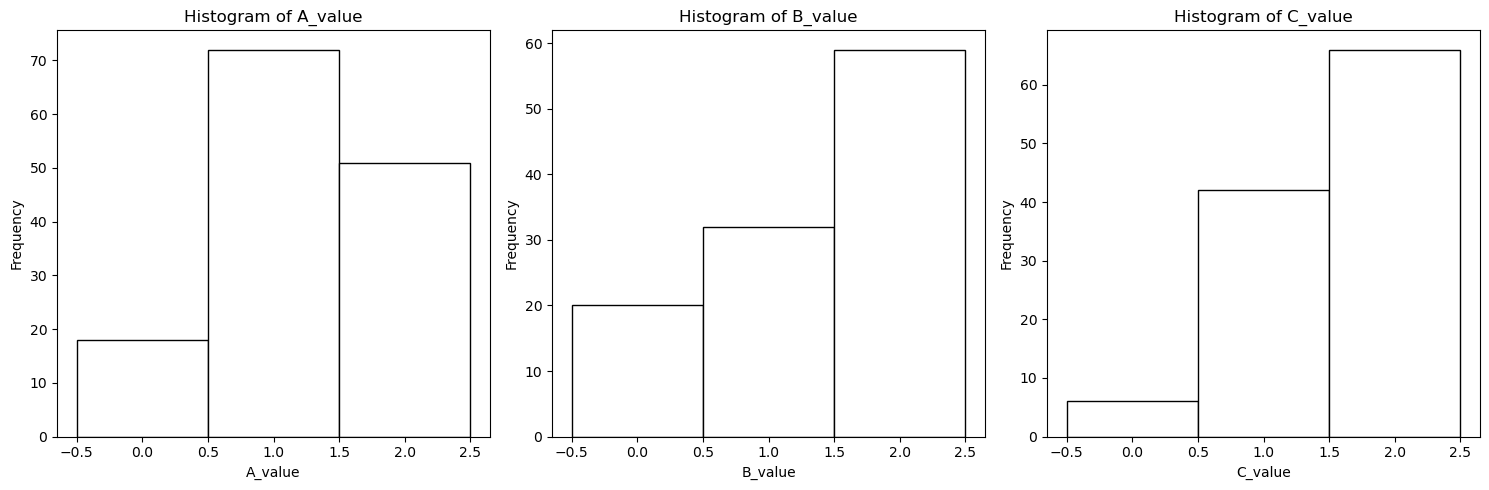

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your CSV file is named 'your_file.csv'
file_path = 'all_letter_scores.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# List of columns for which you want to create histograms
columns_to_plot = ['A_value', 'B_value', 'C_value']

# Create separate subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Iterate through columns and create histograms
for i, column_name in enumerate(columns_to_plot):
    # Plotting the histogram for each column
    axes[i].hist(df[column_name], bins=[-0.5, 0.5, 1.5, 2.5], color='white', edgecolor='black')
    value_counts = df[column_name].value_counts()
    print(value_counts)
    # Adding labels and title for each subplot
    axes[i].set_title(f'Histogram of {column_name}')
    axes[i].set_xlabel(column_name)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()



# Step 1: Combining feature data

In [4]:
import pandas as pd

# Define the file names for each pair
rubinesteroids_files = ['rubinesteroids_circle.csv', 'rubinesteroids_square.csv', 'rubinesteroids_triangle.csv']
diagramrec_files = ['diagramrec_circle.csv', 'diagramrec_square.csv', 'diagramrec_triangle.csv']

# Define a function to concatenate the rows with columns prefixed by the source file
def concatenate_csv_rows(file1, file2, output_file):
    # Read CSV files into pandas DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Replace backslashes with forward slashes in the "file" column
    df1['File'] = df1['File'].str.replace('\\', '/')
    df2['File'] = df2['File'].str.replace('\\', '/')

    # Add prefixes to columns based on the source file
    df1 = df1.add_prefix('rubinesteroids_')
    df2 = df2.add_prefix('diagramrec_')

    # Concatenate DataFrames based on the "file" column
    concatenated_df = pd.concat([df1.set_index("rubinesteroids_File"), df2.set_index("diagramrec_File")], axis=1, join="outer")

    # Save the concatenated DataFrame to a new CSV file
    concatenated_df.reset_index().to_csv(output_file, index=False)

# Iterate over each pair of files and concatenate them
for rubinesteroids_file, diagramrec_file in zip(rubinesteroids_files, diagramrec_files):
    output_file = f"concatenated_{rubinesteroids_file.replace('rubinesteroids_', '')}"
    concatenate_csv_rows(rubinesteroids_file, diagramrec_file, output_file)

print("Concatenation completed successfully!")





Concatenation completed successfully!


C:\Users\chend\AppData\Local\Temp\ipykernel_32264\1650946484.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['File'] = df1['File'].str.replace('\\', '/')
C:\Users\chend\AppData\Local\Temp\ipykernel_32264\1650946484.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['File'] = df2['File'].str.replace('\\', '/')
C:\Users\chend\AppData\Local\Temp\ipykernel_32264\1650946484.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['File'] = df1['File'].str.replace('\\', '/')
C:\Users\chend\AppData\Local\Temp\ipy

## The following code combines the CSVs for circle, square, and triangle into a single file

In [5]:
import csv

# List of CSV file names to combine
csv_files = ['concatenated_circle.csv', 'concatenated_square.csv', 'concatenated_triangle.csv']

# Output CSV file name
output_file = 'rubinesteroids_diagramrec_combined_features.csv'

# Open the output CSV file in write mode
with open(output_file, 'w', newline='') as combined_csv:
    writer = csv.writer(combined_csv)

    # Loop through the list of CSV files
    for index, csv_file in enumerate(csv_files):
        # Open each input CSV file in read mode
        with open(csv_file, 'r') as input_csv:
            reader = csv.reader(input_csv)

            # If it's not the first file, skip the header row
            if index > 0:
                next(reader)

            # Loop through each row in the input CSV file and write it to the combined CSV
            for row in reader:
                writer.writerow(row)

print(f'Combined CSV created: {output_file}')
print("done")


Combined CSV created: rubinesteroids_diagramrec_combined_features.csv
done


# Step 2: Mapping Features for each shape to letters

## The following code splits the data into individual fields and matches them with a sketch given, ID, Shape, and Start time

In [6]:
import csv
import os
import re

# Load data from CSV.csv
feature_data = {}
with open('rubinesteroids_diagramrec_combined_features.csv', mode='r') as feature_file:
    feature_reader = csv.DictReader(feature_file)
    next(feature_reader)  # Skip the header row
    for row in feature_reader:
        # Use os.path.normpath to handle both types of path separators
        file_parts = os.path.normpath(row['index']).split(os.path.sep)
        shape, file_name = file_parts[-2], file_parts[-1]
        # print(shape,file_name)
        new_id, age, _, start_time = file_name.split('_')
        start_time = start_time.split(".")[0]
        # print(new_id,age,start_time)
        feature_data[(new_id, shape, start_time)] = row

## Step 3: Open the file with paths to shapes and match them with their features

In [7]:
first_element = list(feature_data.items())[0]

# Print the first element
print(first_element)

(('F51', 'circle', '1666820274202'), {'index': './data/prompt/circle/F51_3-509_circle_1666820274202.json', 'rubinesteroids_Age': '3.509', 'rubinesteroids_Did Join Strokes': '1', 'rubinesteroids_Total Strokes': '1', 'rubinesteroids_Current Stroke': '0', 'rubinesteroids_Direction changes': '234', 'rubinesteroids_Sum of absolute angles': '61.53553296671382', 'rubinesteroids_Sum of squared angles': '26.724107222409927', 'rubinesteroids_Absolute curve largest fragment': '0.0074861867937761', 'rubinesteroids_Angle of bounding box diagonal': '0.8031898801716711', 'rubinesteroids_Average curvature': '0.1569784004252903', 'rubinesteroids_Cos of first to last': '0.7452413135250994', 'rubinesteroids_Cos of initial angle': '0.2169304578186561', 'rubinesteroids_Initial angle': '77.47119229084849', 'rubinesteroids_Curviness': '36.77083091099025', 'rubinesteroids_Distance from first to last': '50.99019513592785', 'rubinesteroids_Least Square Error': '13341874.642057909', 'rubinesteroids_Max curvature

## Importing the data from the keyfile to match partcipant old indentifier with the new ID

In [8]:
# Load data from keyfile.csv
keyfile_data = {}
with open('keyfile.csv', mode='r') as keyfile_file:
    keyfile_reader = csv.DictReader(keyfile_file)
    for row in keyfile_reader:
        keyfile_data[row['Identifier']] = row['New ID']
# print(keyfile_data)

## We now add the list of features that belong to each file path

In [9]:
import json

# Create a new CSV file to store the updated data
with open('rubinesteroids_diagramrec_all_shapes_combined_with_letter_scores.csv', mode='w', newline='') as updated_file:
    fieldnames = ['Participant','Circle', 'Square', 'index', 'Triangle', 'A','B','C','A_value','B_value','C_value', "Circle_features"
                  ,"Square_features","Triangle_features"]
    writer = csv.DictWriter(updated_file, fieldnames=fieldnames)
    writer.writeheader()

    childrens_data_path = 'kid-study-data'  # Replace with the actual path to your folder
    with open('all_letter_scores.csv', mode='r') as letter_paths_file:
        letter_paths_reader = csv.DictReader(letter_paths_file)
        for row in letter_paths_reader:
            new_id = keyfile_data.get(row['Participant'][:8], None)
#             print(row)
            if new_id:
                circle_features = -1
                square_features = -1
                triangle_features = -1

                if row['Circle'] != 0 and row['Circle'] != "null" and row['Circle'] != "":
                    row['Circle'] = row['Circle'].replace("\\", "/")
                    circle_filepath_parts = row['Circle'].split("/")[2].split("_")
                    c_ID = circle_filepath_parts[0][:8]
                    c_starttime = circle_filepath_parts[1][:-5]
                    if (keyfile_data[c_ID], 'circle', c_starttime) in feature_data:
                        circle_features = feature_data[(keyfile_data[c_ID], 'circle', c_starttime)]

                if row['Square'] != 0 and row['Square'] != "null" and row['Square'] != "":
                    row['Square'] = row['Square'].replace("\\", "/")
                    square_filepath_parts = row['Square'].split("/")[2].split("_")
                    s_ID = square_filepath_parts[0][:8]
                    s_starttime = square_filepath_parts[1][:-5]
                    if (keyfile_data[s_ID], 'square', s_starttime) in feature_data:
                        square_features = feature_data[(keyfile_data[s_ID], 'square', s_starttime)]

                if row['Triangle'] != 0 and row['Triangle'] != "null" and row['Triangle'] != "":
                    row['Triangle'] = row['Triangle'].replace("\\", "/")
                    triangle_filepath_parts = row['Triangle'].split("/")[2].split("_")
                    t_ID = triangle_filepath_parts[0][:8]
                    t_starttime = triangle_filepath_parts[1][:-5]
                    if (keyfile_data[t_ID], 'triangle', t_starttime) in feature_data:
                        triangle_features = feature_data[(keyfile_data[t_ID], 'triangle', t_starttime)]


                # Update the row with the found values or -1
                row['Circle_features'] = circle_features
                row['Square_features'] = square_features
                row['Triangle_features'] = triangle_features

            # Write the updated row to the new CSV file
            writer.writerow(row)


In [10]:
import pandas as pd
import ast
# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = 'rubinesteroids_diagramrec_all_shapes_combined_with_letter_scores.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
# Drop the specified columns
columns_to_drop = ["Circle", "Square", "index", "Triangle", "A", "B", "C"]
df = df.drop(columns=columns_to_drop)

# Columns containing dictionaries
columns_with_dicts = ['Circle_features', 'Square_features', 'Triangle_features']

# Expand columns with dictionaries
for column in columns_with_dicts:
    # Convert string representation of dictionaries to actual dictionaries
    df[column] = df[column].apply(ast.literal_eval)
    
    # Get the prefix based on the shape (circle, square, or triangle)
    shape_prefix = column.split('_')[0]
    print(shape_prefix)
    # Expand the dictionary into separate columns with dynamic prefix
    expanded_columns = pd.json_normalize(df[column])
    expanded_columns.columns = [f"{shape_prefix}_{col}" for col in expanded_columns.columns]
    print(expanded_columns.columns)
    
    # Concatenate the expanded columns and drop the original column
    df = pd.concat([df.drop([column], axis=1), expanded_columns], axis=1)
    print(df)

    # Save the DataFrame to a CSV file
df.to_csv('expanded_rubinesteroids_diagramrec_all_shapes_combined_with_letter_scores.csv', index=False)

Circle
Index(['Circle_index', 'Circle_rubinesteroids_Age',
       'Circle_rubinesteroids_Did Join Strokes',
       'Circle_rubinesteroids_Total Strokes',
       'Circle_rubinesteroids_Current Stroke',
       'Circle_rubinesteroids_Direction changes',
       'Circle_rubinesteroids_Sum of absolute angles',
       'Circle_rubinesteroids_Sum of squared angles',
       'Circle_rubinesteroids_Absolute curve largest fragment',
       'Circle_rubinesteroids_Angle of bounding box diagonal',
       ...
       'Circle_diagramrec_Total angle',
       'Circle_diagramrec_Sum of absolute angles',
       'Circle_diagramrec_Sum of squared angles',
       'Circle_diagramrec_Speed minima',
       'Circle_diagramrec_Distance from last stroke',
       'Circle_diagramrec_Distance to next stroke',
       'Circle_diagramrec_Time from last stroke',
       'Circle_diagramrec_Time till next stroke',
       'Circle_diagramrec_Speed from last stroke',
       'Circle_diagramrec_Speed to next stroke'],
      dtype='

# Step 4: Taking a Quick Look at the Data
## We can take a look at the distribution of letters scores

NUM OF UNIQUE PARTICIPANTS: 58


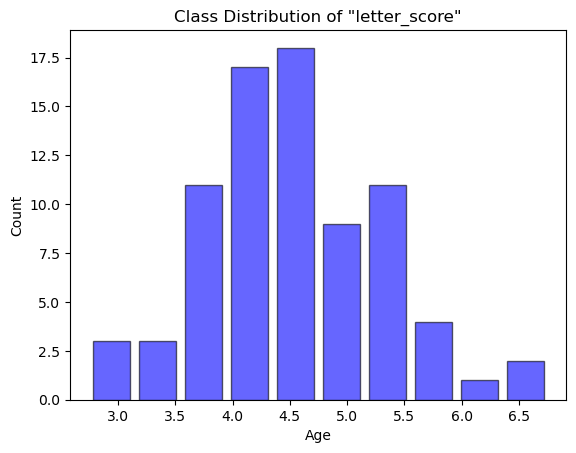

DROPPING THE FOLLOWING: ['Circle_index', 'Square_index', 'Triangle_index', 'Triangle_age', 'Square_age', 'Circle_age', 'Circle_rubinesteroids_Age', 'Square_rubinesteroids_Age', 'Triangle_rubinesteroids_Age', 'Circle_diagramrec', 'Square_diagramrec', 'Triangle_diagramrec', 'B_value', 'C_value']
DataFrame Shape: (46, 272)


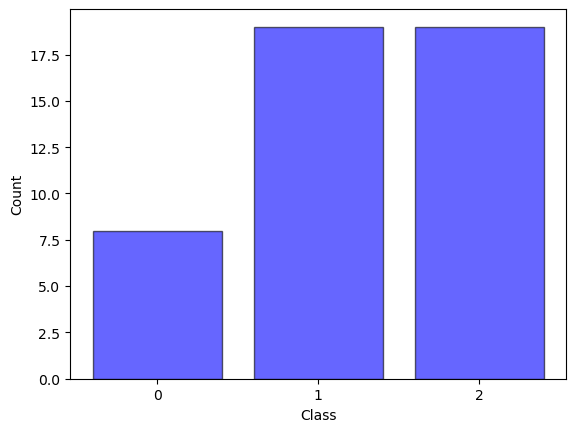

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

target = 'A_value'
feature_sets = ['rubine']


df = pd.read_csv('expanded_rubinesteroids_diagramrec_all_shapes_combined_with_letter_scores.csv')

unique_participants = df["Participant"].unique()
df = df.groupby(['Participant',target]).mean().reset_index()
print("NUM OF UNIQUE PARTICIPANTS:",len(unique_participants))
y = df["Square_rubinesteroids_Age"]

# Create a histogram of the class distribution
plt.hist(y, rwidth=0.8, alpha=0.6, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')

plt.title('Class Distribution of "letter_score"')
plt.show()


prefixes_to_drop = ['Circle_index','Square_index','Triangle_index','Triangle_age','Square_age','Circle_age']
if 'rubine' in feature_sets:
    prefixes_to_drop += ["Circle_rubinesteroids_Age"]
    prefixes_to_drop += ["Square_rubinesteroids_Age"]
    prefixes_to_drop += ["Triangle_rubinesteroids_Age"]
else:
    prefixes_to_drop += ["Circle_rubinesteroids"]
    prefixes_to_drop += ["Square_rubinesteroids"]
    prefixes_to_drop +=[ "Triangle_rubinesteroids"]

if 'diagram' in feature_sets:
    prefixes_to_drop += ["Circle_diagramrec_Age"]
    prefixes_to_drop += ["Square_diagramrec_Age"]
    prefixes_to_drop += ["Triangle_diagramrec_Age"]
else:
    prefixes_to_drop += ["Circle_diagramrec"]
    prefixes_to_drop += ["Square_diagramrec"]
    prefixes_to_drop +=[ "Triangle_diagramrec"]
    

if target == 'A_value':
    prefixes_to_drop += ["B_value"]
    prefixes_to_drop += ["C_value"]
elif target == 'B_value':
    prefixes_to_drop += ["A_value"]
    prefixes_to_drop += ["C_value"]
elif target == 'C_value':
    prefixes_to_drop += ["A_value"]
    prefixes_to_drop += ["B_value"]

print("DROPPING THE FOLLOWING:",prefixes_to_drop)
columns_to_drop = [col for col in df.columns if any(col.startswith(prefix) for prefix in prefixes_to_drop)]
df = df.drop(columns=columns_to_drop)
df = df.dropna()
# Replace underscores with spaces in column names
df.columns = df.columns.str.replace('_rubinesteroids_', ' ')


df.to_csv('check_1.csv', index=False)

print("DataFrame Shape:", df.shape)

# Extract the 'letter_score' column
y = df[target]

# Create a histogram of the class distribution
plt.hist(y, bins=[-0.5, 0.5, 1.5, 2.5], rwidth=0.8, alpha=0.6, color='blue', edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2])
plt.title('')
plt.show()

# Predicting Letter Score based on Features
## In the following we use the rubine features from the children sketches

True Positive: 11
True Negative: 9
False Positive: 10
False Negative: 8
Precision: 0.5238095238095238
Recall: 0.5789473684210527
F1 Score: 0.5500000000000002
Accuracy: 0.5263157894736842
AUC-ROC Score: 0.45983379501385047


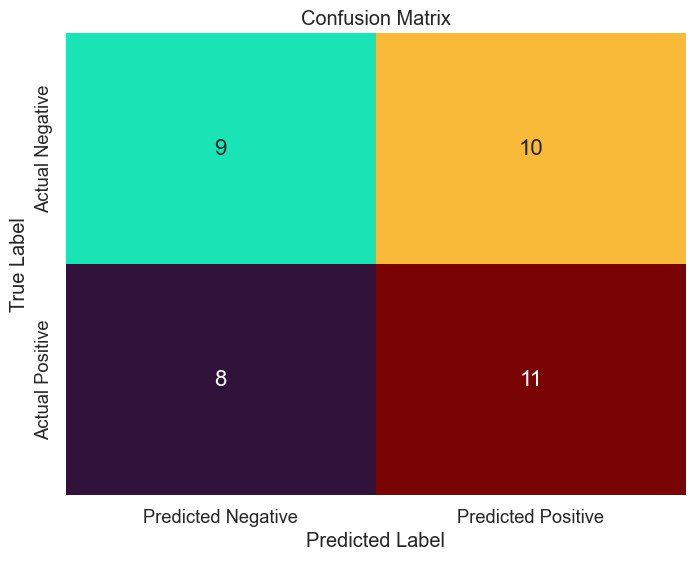

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import KFold

# Assuming df is your original DataFrame
# Drop rows where A_value is equal to 0
df = df[df[target] != 0]
# Separate features and target variable
X = df.drop([target, "Participant"], axis=1)
X = X.replace([np.inf, -np.inf], [1e12, -1e12])
y = (df[target] > 1).astype(int)  # Convert to binary classification (positive/negative)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

all_true_labels = []
all_predictions = []
all_probabilities = []

# Initialize lists to store TP, TN, FP, and FN counts for each fold
tp_counts = []
tn_counts = []
fp_counts = []
fn_counts = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train a Random Forest classifier on the training data
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_classifier.predict(X_test)
    y_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Get predicted probabilities for class 1

    all_true_labels.extend(y_test)
    all_predictions.extend(y_pred)
    all_probabilities.extend(y_prob)

    # Calculate TP, TN, FP, FN counts for the current fold
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tn_counts.append(tn)
    fp_counts.append(fp)
    fn_counts.append(fn)
    tp_counts.append(tp)

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)

# Now TP, TN, FP, and FN contain the counts based on your conditions
print("True Positive:", conf_matrix[1, 1])
print("True Negative:", conf_matrix[0, 0])
print("False Positive:", conf_matrix[0, 1])
print("False Negative:", conf_matrix[1, 0])

precision = precision_score(all_true_labels, all_predictions)
recall = recall_score(all_true_labels, all_predictions)

# F1 Score
f1_score_value = f1_score(all_true_labels, all_predictions)

# Accuracy
accuracy = accuracy_score(all_true_labels, all_predictions)

# Calculate AUC-ROC
auc_roc = roc_auc_score(all_true_labels, all_probabilities)

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score_value)
print("Accuracy:", accuracy)
print("AUC-ROC Score:", auc_roc)

# Calculate total points and incorrect predictions count for each fold
fold_df = pd.DataFrame({
    'Fold': range(1, kf.get_n_splits() + 1),
    'True Negative': tn_counts,
    'False Positive': fp_counts,
    'False Negative': fn_counts,
    'True Positive': tp_counts
})

# Visualize confusion matrix with the same color palette
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="turbo", annot_kws={"size": 16}, cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


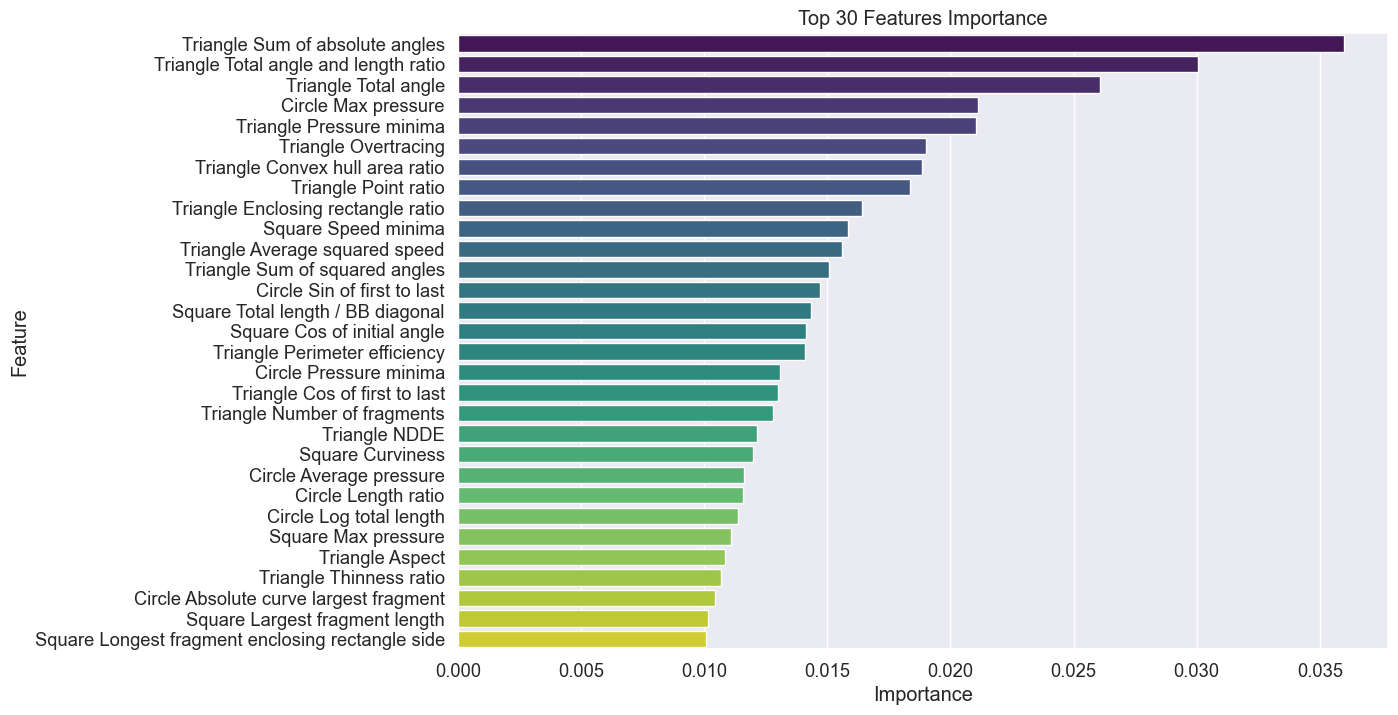

In [13]:

# Train a Random Forest classifier on the entire dataset
rf_classifier_full = RandomForestClassifier(random_state=42)
rf_classifier_full.fit(X, y)

# Get feature importances
feature_importances = rf_classifier_full.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

N = 30 # Select the top N features
top_n_features = feature_importance_df.head(N)

# Plot the top N features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_n_features, palette='viridis')
plt.title(f'Top {N} Features Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


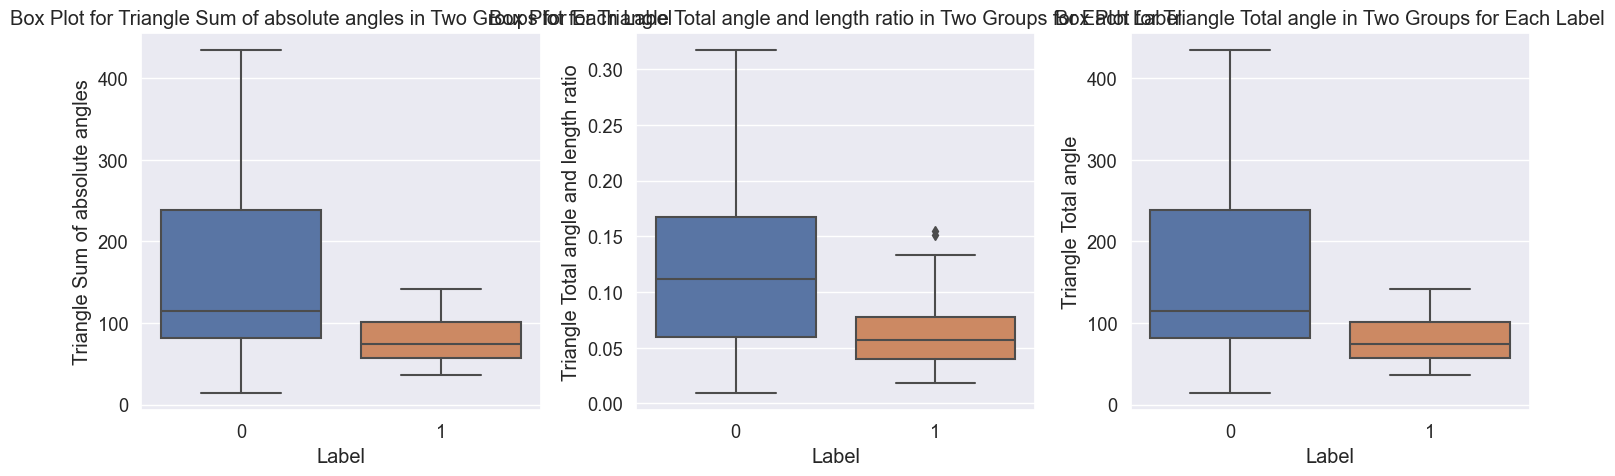

In [14]:
# Get the number of top features from the user
num_top_features = 3

# Get the top features
top_features = top_n_features.iloc[:num_top_features]['Feature']

# Create subplots for each feature
plt.figure(figsize=(5 * num_top_features, 5))

for i, feature in enumerate(top_features):
    plt.subplot(1, num_top_features, i+1)
    sns.boxplot(x=y, y=X[feature])
    plt.title(f'Box Plot for {feature} in Two Groups for Each Label')
    plt.xlabel('Label')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()
